## Project: Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# :: Fill this in based on where you saved the training and testing data

training_file = '../data/train.p'
validation_file= '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


### Basic Summary of the Data Set 

In [2]:
import numpy as np

In [3]:

# :: Number of training examples
n_train = len(X_train)

# :: Number of validation examples
n_validation = len(X_valid)

# :: Number of testing examples.
n_test = len(X_test)

# :: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# :: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). 

### Images for all classes are displayed below. The images are randomly picked from the given images.

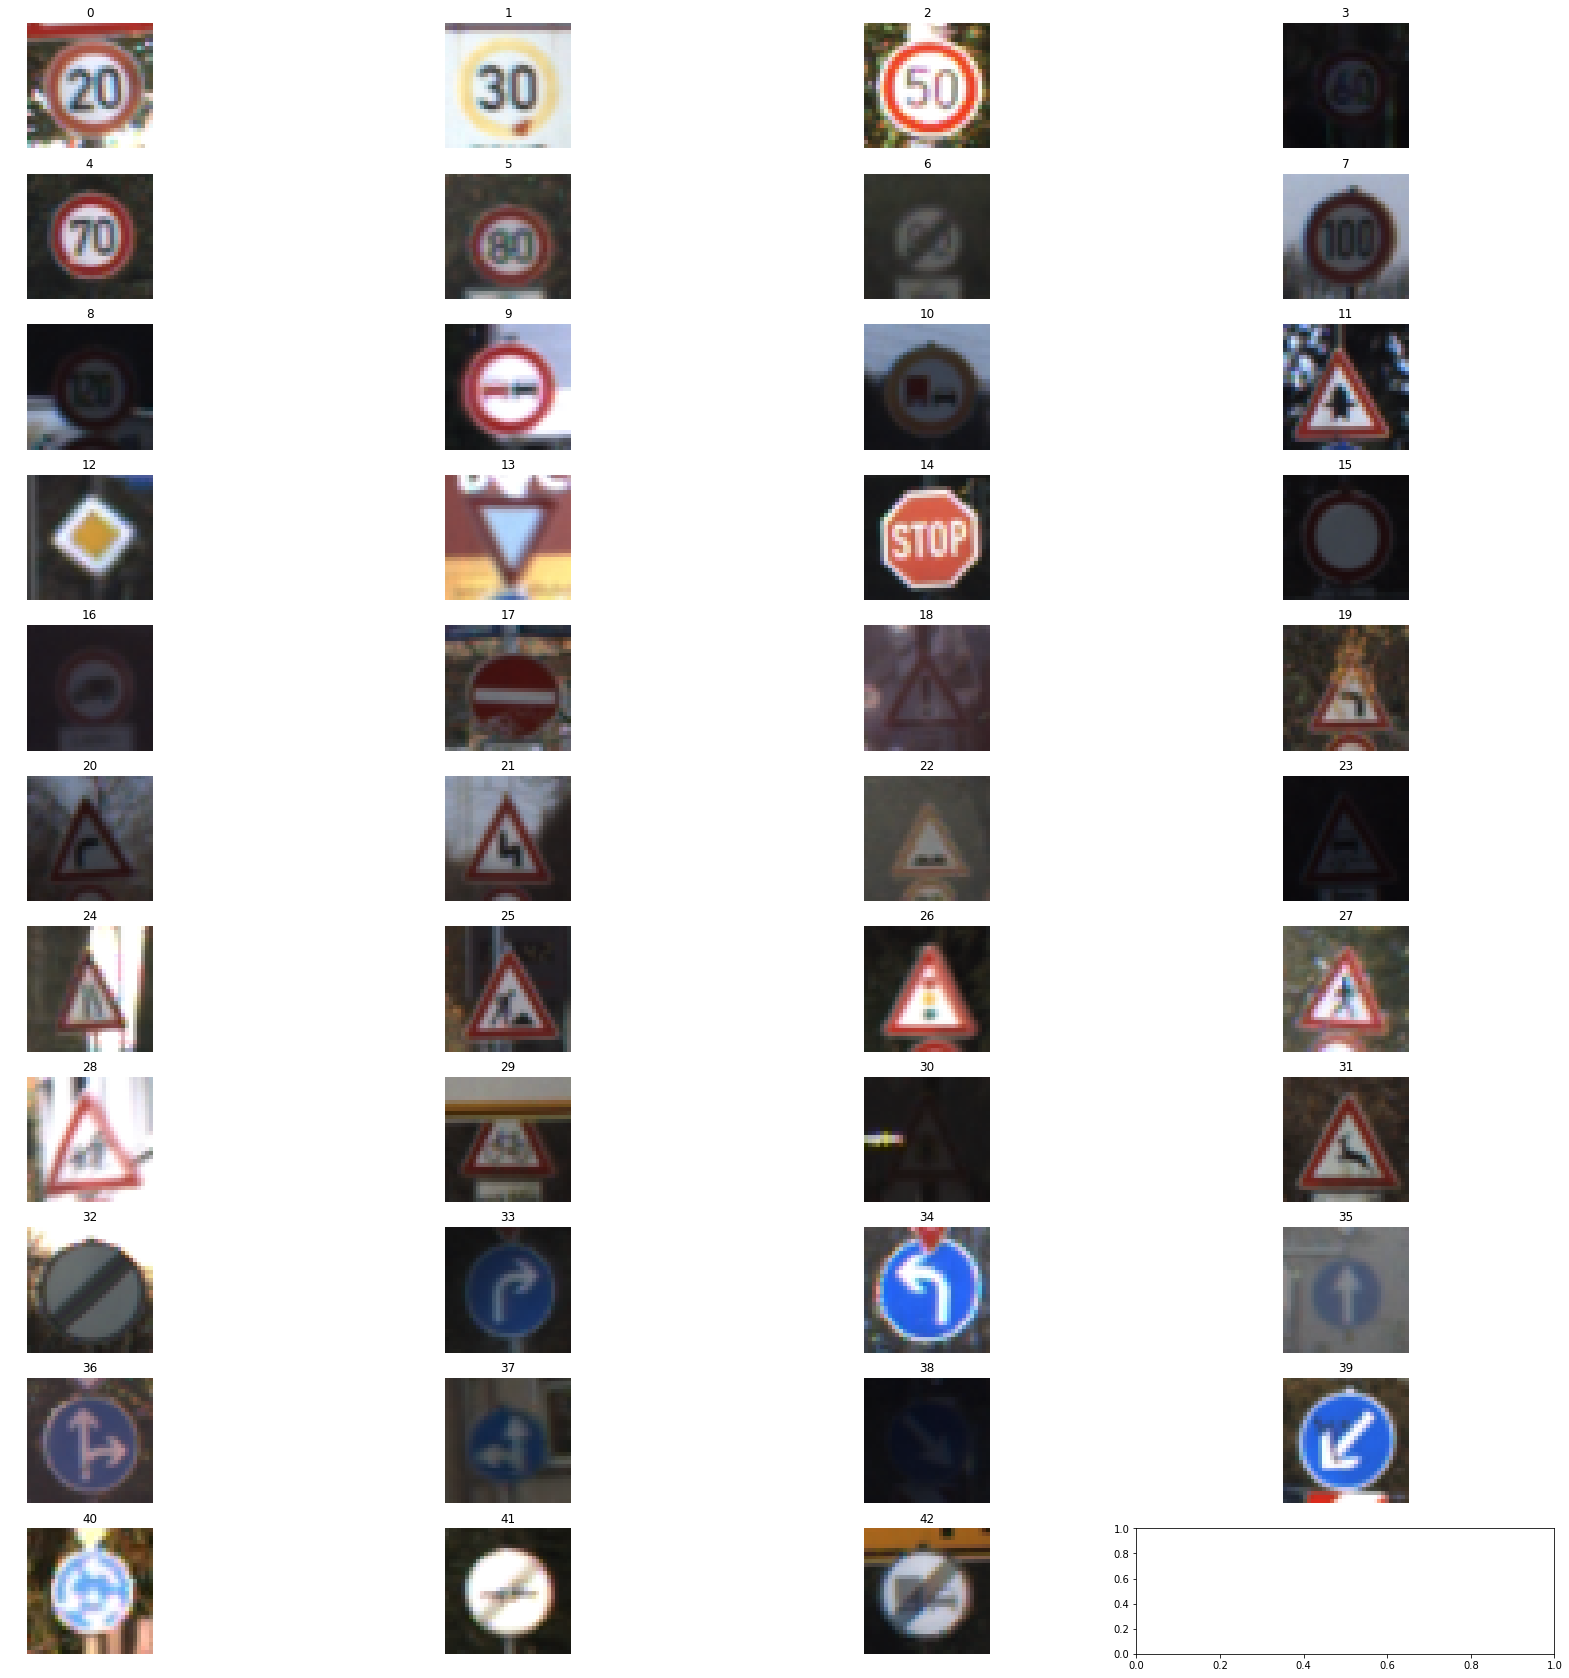

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import random

#show random images of all classes
dup_indexes = [np.argwhere(i==y_train) for i in np.unique(y_train)]

fig, axs = plt.subplots(11,4, figsize=(30, 30))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
i = 0
for val in dup_indexes:
    index = random.randint(0, len(val))
    actual_index = val[index][0]
    image = X_train[actual_index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[actual_index])
    i += 1

### Below code blocks plot the class distribution for TRAINING, VALIDATION and TEST datasets.

In [5]:
def provide_label_distribution(y):
    return np.unique(y, return_counts=True)

In [6]:
### Distribution of labels in training, validation and test data
training_dist = provide_label_distribution(y_train)
validation_dist = provide_label_distribution(y_valid)
test_dist = provide_label_distribution(y_test)

Text(0.5,1,'Distribution of Test Set')

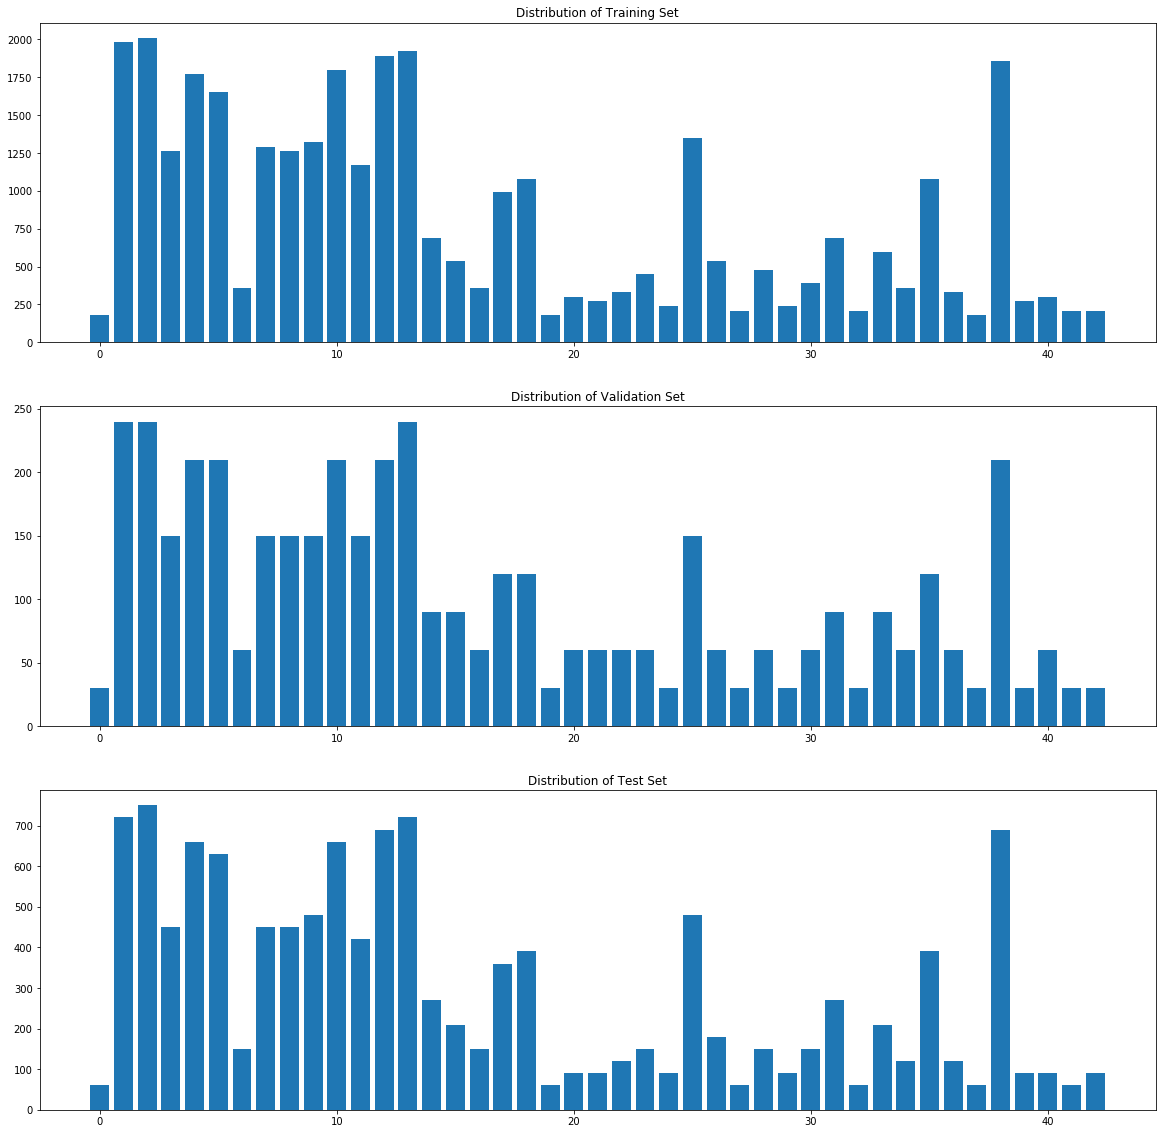

In [7]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,20)

fig, axs = plt.subplots(3, 1)
axs[0].bar(training_dist[0], training_dist[1])
axs[0].set_title('Distribution of Training Set')
axs[1].bar(validation_dist[0], validation_dist[1])
axs[1].set_title('Distribution of Validation Set')
axs[2].bar(test_dist[0], test_dist[1])
axs[2].set_title('Distribution of Test Set')

----

## Step 2: Design and Test a Model Architecture

Below has the Design and implementation a deep learning model that learns to recognize traffic signs. The model is trained and tested on the images loaded above.

NOTE: The model is built taking by taking inspiration from the LeNet-5 CNN.

### Pre-process the Data Set (normalization, grayscale, etc.)

Image data has been normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data, which is what i used in this project. 

### All the images in training, validation and test datasets are first converted from RGB to grayscale and then normalized.

### Below is a plot of RGB image.

Text(0.5,1,'RGB Image')

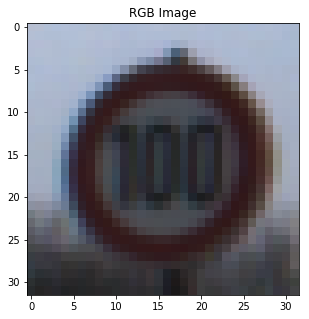

In [9]:
index = random.randint(0, len(X_train))

plt.figure(figsize = (5,5))
plt.imshow(X_train[index])
plt.title("RGB Image")

### Convert RGB Image to Grayscale. Below is the Grayscale image for the above RGB Image...

In [10]:
X_train = np.dot(X_train[...,:3], [0.299, 0.587, 0.114])
# X_train = X_train[:, :, :, np.newaxis]

X_valid = np.dot(X_valid[...,:3], [0.299, 0.587, 0.114])
# X_valid = X_valid[:, :, :, np.newaxis]

X_test = np.dot(X_test[...,:3], [0.299, 0.587, 0.114])
# X_test = X_test[:, :, :, np.newaxis]

Text(0.5,1,'Grayscale Image')

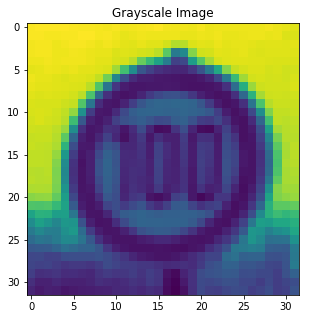

In [11]:
plt.figure(figsize = (5,5))
plt.imshow(X_train[index])
plt.title("Grayscale Image")

### Add new axis to the grayscale images

In [12]:
X_train = X_train[:, :, :, np.newaxis]

X_valid = X_valid[:, :, :, np.newaxis]

X_test = X_test[:, :, :, np.newaxis]

### Mean Values before Normalization.

In [13]:
print("Mean of X_train before Normalization:", np.mean(X_train))
print("Mean of X_valid before Normalization:", np.mean(X_valid))
print("Mean of X_test before Normalization:", np.mean(X_test))

Mean of X_train before Normalization: 81.9164679387
Mean of X_valid before Normalization: 82.7522688698
Mean of X_test before Normalization: 81.2767774761


### Normalize X_train, X_valid and X_test

In [14]:
X_train = (X_train - 128.) / 128.
X_valid = (X_valid - 128.) / 128.
X_test = (X_test - 128.) / 128.

In [15]:
print("Mean of X_train after Normalization:", np.mean(X_train))
print("Mean of X_valid after Normalization:", np.mean(X_valid))
print("Mean of X_test after Normalization:", np.mean(X_test))

Mean of X_train after Normalization: -0.360027594229
Mean of X_valid after Normalization: -0.353497899455
Mean of X_test after Normalization: -0.365025175968


### Shuffle Training Data

In [16]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

In [17]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [18]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

### Epochs and Batch Size

In [19]:
EPOCHS = 50
BATCH_SIZE = 128

### Mean and variance values

In [20]:
mu = 0
sigma = 0.1

### Modified LeNet Architecture:

NOTE: In all the below Layers a Mean of “0” variance of “0.1” is used. 
*	Layer 1: has two Convolutional Layers followed by an RELU Activation and Max Pooling Layers
    *	Convolutional Layers with input shape “32x32x1” and output shape “30x30x6”. The layer has a filter shape of “(3, 3, 1, 6)” and a stride of 1x1 and uses VALID Padding.
    *	Convolutional Layers with input shape “30x30x6” and output shape “28x28x6”. The layer has a filter shape of “(3, 3, 6, 6)” and a stride of 1x1 and uses VALID Padding.
    *	RELU Activation Layer.
    *	Max Pooling layer with input shape “28x28x6” and output shape “14x14x6”. Uses a stride of 2x2 with Valid Padding.
*	Layer 2: has two Convolutional Layers followed by an RELU Activation and Max Pooling Layers
    *	Convolutional Layers with input shape “14x14x6” and output shape “12x12x16”. The layer has a filter shape of “(3, 3, 6, 16)” and a stride of 1x1 and uses VALID Padding.
    *	Convolutional Layers with input shape “12x12x16” and output shape “10x10x16”. The layer has a filter shape of “(3, 3, 16, 16)” and a stride of 1x1 and uses VALID Padding.
    *	RELU Activation Layer.
    *	Max Pooling layer with input shape “10x10x16” and output shape “5x5x16”. Uses a stride of 2x2 with Valid Padding.
*	Layer 3: has two Convolutional Layers followed by an RELU Activation Layer
    *	Convolutional Layers with input shape “5x5x16” and output shape “3x3x400”. The layer has a filter shape of “(3, 3, 16, 400)” and a stride of 1x1 and uses VALID Padding.
    *	Convolutional Layers with input shape “3x3x400” and output shape “1x1x400”. The layer has a filter shape of “(3, 3, 400, 400)” and a stride of 1x1 and uses VALID Padding.
    *	RELU Activation Layer.
*	Flatten Layer 2 and Layer 3 outputs and Concatenate: the outputs from layer 2 and layer 3 are flattened to have a shape of (400) each, and they are concatenated to get a shape of (800)
*	Dropout: TensorFlow dropout function is applied on the output of the above layer. 
*	Layer 4: fully connected layer with input feature shape of (800) and output of shape (400)
*	Dropout: TensorFlow dropout function is applied on the output of the above layer.
*	Layer 5: fully connected layer with input feature shape of (400) and output of shape (200)
*	Dropout: TensorFlow dropout function is applied on the output of the above layer.
*	Layer 6: fully connected layer with input feature shape of (200) and output of shape (43)


In [21]:
def Modified_LeNet(x):    
    
    ############## Layer 1: Has Two Convolutional Layers. Input: 32x32x1 -> Output: 14x14x6. ##############
    # ============ Convolution Layer One: 32x32x1 -> 30x30x6 ==============================================
    conv11_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 6), mean = mu, stddev = sigma))
    conv11_b = tf.Variable(tf.zeros(6))
    conv11   = tf.nn.bias_add(tf.nn.conv2d(x, conv11_W, strides=[1, 1, 1, 1], padding='VALID'), conv11_b)
    # ============ Convolution Layer Two: 30x30x6 -> 28x28x6 ==============================================
    conv12_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 6, 6), mean = mu, stddev = sigma))
    conv12_b = tf.Variable(tf.zeros(6))
    conv12   = tf.nn.bias_add(tf.nn.conv2d(conv11, conv12_W, strides=[1, 1, 1, 1], padding='VALID'), conv12_b)
    # ============ Activation Function ====================================================================
    conv12 = tf.nn.relu(conv12)
    # ============ Max Pooling: 28x28x6 -> 14x14x6 ========================================================
    conv12 = tf.nn.max_pool(conv12, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    
    ############## Layer 2: Has Two Convolutional Layers. Input: 14x14x6 -> Output: 5x5x16. ###############
    # ============ Convolution Layer One: 14x14x6 -> 12x12x16 =============================================
    conv21_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 6, 16), mean = mu, stddev = sigma))
    conv21_b = tf.Variable(tf.zeros(16))
    conv21   = tf.nn.bias_add(tf.nn.conv2d(conv12, conv21_W, strides=[1, 1, 1, 1], padding='VALID'), conv21_b)
    # ============ Convolution Layer Two: 12x12x16 -> 10x10x16 ============================================
    conv22_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 16), mean = mu, stddev = sigma))
    conv22_b = tf.Variable(tf.zeros(16))
    conv22   = tf.nn.bias_add(tf.nn.conv2d(conv21, conv22_W, strides=[1, 1, 1, 1], padding='VALID'), conv22_b)
    # ============ Activation Function ====================================================================
    conv22 = tf.nn.relu(conv22)
    # ============ Max Pooling: 10x10x16 -> 5x5x16 ========================================================
    conv22 = tf.nn.max_pool(conv22, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    
    ############## Layer 3: Has Two Convolutional Layers. Input: 5x5x16 -> Output: 1x1x400. ###############
    # ============ Convolution Layer One: 5x5x16 -> 3x3x400 ===============================================
    conv31_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 400), mean = mu, stddev = sigma))
    conv31_b = tf.Variable(tf.zeros(400))
    conv31   = tf.nn.bias_add(tf.nn.conv2d(conv22, conv31_W, strides=[1, 1, 1, 1], padding='VALID'), conv31_b)
    # ============ Convolution Layer Two: 3x3x400 -> 1x1x400 ==============================================
    conv32_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 400, 400), mean = mu, stddev = sigma))
    conv32_b = tf.Variable(tf.zeros(400))
    conv32   = tf.nn.bias_add(tf.nn.conv2d(conv31, conv32_W, strides=[1, 1, 1, 1], padding='VALID'), conv32_b)
    # ============ Activation Function ====================================================================
    conv32 = tf.nn.relu(conv32)
    
    
    
    ############## Flatten Layer 2 Output: 5x5x16 -> 400 ##################################################
    flat_conv22 = flatten(conv22)
    ############## Flatten Layer 3 Output: 1x1x400 -> 400 #################################################
    flat_conv32 = flatten(conv32)
    
    ############## Contact the above two flat_conv22 and flat_conv32: 400 + 400 -> 800 ####################
    flat_conv22_and_32 = tf.concat([flat_conv22, flat_conv32], 1)
    
    ##############  Apply DROPOUT with retain_prob ########################################################
    full_connect_input_1 = tf.nn.dropout(flat_conv22_and_32, retain_prob)
    
    
    
    ############## Layer 4: FUlly Connected Layer: 800 -> 400 #############################################
    fc4_W = tf.Variable(tf.truncated_normal(shape=(800, 400), mean = mu, stddev = sigma))
    fc4_b = tf.Variable(tf.zeros(400))
    fc4   = tf.add(tf.matmul(full_connect_input_1, fc4_W), fc4_b)
    
    ##############  Apply DROPOUT with retain_prob ########################################################
    full_connect_input_2 = tf.nn.dropout(fc4, retain_prob)
    
    
    
    ############## Layer 5: FUlly Connected Layer: 400 -> 200 #############################################
    fc5_W = tf.Variable(tf.truncated_normal(shape=(400, 200), mean = mu, stddev = sigma))
    fc5_b = tf.Variable(tf.zeros(200))
    fc5   = tf.add(tf.matmul(full_connect_input_2, fc5_W), fc5_b)
    
    ##############  Apply DROPOUT with retain_prob ########################################################
    full_connect_input_3 = tf.nn.dropout(fc5, retain_prob)
    
    
    
    ############## Layer 6: FUlly Connected Layer: 200 -> 43 ##############################################
    fc6_W = tf.Variable(tf.truncated_normal(shape=(200, 43), mean = mu, stddev = sigma))
    fc6_b = tf.Variable(tf.zeros(43))
    logits = tf.add(tf.matmul(full_connect_input_3, fc6_W), fc6_b)
    
    return logits

### Define Variables

In [22]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
retain_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Learning Rate

In [24]:
rate = 0.0001

### Setup for Training and evaluation

In [25]:
logits = Modified_LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [26]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, retain_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train and check Validation Accuracy.

In [27]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, retain_prob: 0.5})
        
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.459

EPOCH 2 ...
Validation Accuracy = 0.750

EPOCH 3 ...
Validation Accuracy = 0.835

EPOCH 4 ...
Validation Accuracy = 0.886

EPOCH 5 ...
Validation Accuracy = 0.914

EPOCH 6 ...
Validation Accuracy = 0.924

EPOCH 7 ...
Validation Accuracy = 0.932

EPOCH 8 ...
Validation Accuracy = 0.937

EPOCH 9 ...
Validation Accuracy = 0.940

EPOCH 10 ...
Validation Accuracy = 0.942

EPOCH 11 ...
Validation Accuracy = 0.946

EPOCH 12 ...
Validation Accuracy = 0.945

EPOCH 13 ...
Validation Accuracy = 0.950

EPOCH 14 ...
Validation Accuracy = 0.950

EPOCH 15 ...
Validation Accuracy = 0.949

EPOCH 16 ...
Validation Accuracy = 0.960

EPOCH 17 ...
Validation Accuracy = 0.956

EPOCH 18 ...
Validation Accuracy = 0.960

EPOCH 19 ...
Validation Accuracy = 0.953

EPOCH 20 ...
Validation Accuracy = 0.956

EPOCH 21 ...
Validation Accuracy = 0.960

EPOCH 22 ...
Validation Accuracy = 0.963

EPOCH 23 ...
Validation Accuracy = 0.961

EPOCH 24 ...
Validation Accura

### Check Accuracy on Training Set and Test Set

In [28]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    training_accuracy = evaluate(X_train, y_train)
    print("Training Accuracy = {:.3f}".format(training_accuracy))
    print()
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Training Accuracy = 1.000

Test Accuracy = 0.957


---

## Step 3: Test a Model on New Images


You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [30]:
import glob
import cv2
import matplotlib.image as mpimg

### Load New Images and Resize them to (32x32x1)

In [53]:
new_image_list = []
new_image_names = []
new_image_class = []
for img in enumerate(glob.glob('./New_Images/*.jpg')):
    image = cv2.imread(img[1])
    image = cv2.resize(image,(32,32))
    new_image_list.append(image)
    new_image_names.append(img[1])
    print(image.shape)
    print(img[1])
    new_image_class.append(int(img[1].split('class_')[1].split('.jpg')[0]))

(32, 32, 3)
./New_Images/class_13.jpg
(32, 32, 3)
./New_Images/class_41.jpg
(32, 32, 3)
./New_Images/class_35.jpg
(32, 32, 3)
./New_Images/class_18.jpg
(32, 32, 3)
./New_Images/class_14.jpg


### Plot Images Before Normalization and converted to Grayscale

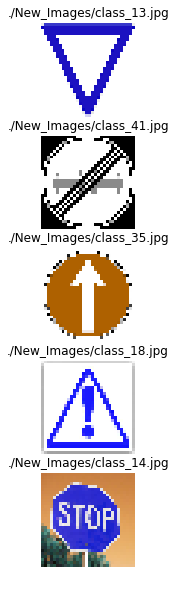

In [54]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

fig, axs = plt.subplots(5,1, figsize=(20, 10))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

for index, val in enumerate(new_image_list):
    axs[index].axis('off')
    axs[index].imshow(val)
    axs[index].set_title(new_image_names[index])

### Convert to Grayscale and Normalize

In [55]:
image_list = np.array(new_image_list)
image_list = np.dot(image_list[...,:3], [0.299, 0.587, 0.114])
# image_list = image_list[:, :, :, np.newaxis]

image_list = (image_list - 128.) / 128.

print(image_list.shape)

(5, 32, 32)


### Plot Above Images converted to Grayscale

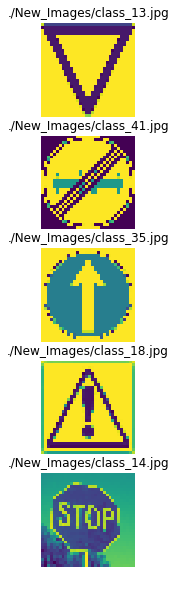

In [56]:
fig, axs = plt.subplots(5,1, figsize=(20, 10))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

index = 0
for val in image_list:
    axs[index].axis('off')
    axs[index].imshow(val)
    axs[index].set_title(new_image_names[index])
    index += 1

### Add new Axis

In [57]:
image_list = image_list[:, :, :, np.newaxis]

print(image_list.shape)

(5, 32, 32, 1)


### Predict the Sign Type for Each Image

In [58]:
print("List of class for new images:" , new_image_class)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.')) # Load the saved model
    out_predict = sess.run(logits,feed_dict={x:image_list, retain_prob: 1.0})
    probabilities=sess.run(tf.nn.softmax(out_predict))
    out_list = []
    for val in probabilities:
        out_list.append(np.argmax(val))
print("List Of Classes Predicted for new Images:", out_list)

List of class for new images: [13, 41, 35, 18, 14]
INFO:tensorflow:Restoring parameters from ./lenet
List Of Classes Predicted for new Images: [13, 41, 35, 18, 14]


### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [59]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(image_list, new_image_class)
    print("Accuracy on New Images = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Accuracy on New Images = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [1]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

In [60]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    out_predict = sess.run(logits,feed_dict={x:image_list, retain_prob: 1.0})
    probabilities=sess.run(tf.nn.softmax(out_predict))
    top_indexes, top_probabilities = sess.run(tf.nn.top_k(probabilities, k=5))
    for i in range(len(top_indexes)):
        print("Image {}: Has top probabilities {} at indices {}".format(i+1, top_indexes[i], top_probabilities[i]))
        print()

INFO:tensorflow:Restoring parameters from ./lenet
Image 1: Has top probabilities [ 1.  0.  0.  0.  0.] at indices [13  0  1  2  3]

Image 2: Has top probabilities [  1.00000000e+00   4.30400993e-11   6.79880797e-24   1.40780620e-24
   1.29028476e-24] at indices [41 20 36 25 32]

Image 3: Has top probabilities [  1.00000000e+00   1.93228034e-19   2.80844701e-21   1.94080975e-22
   1.72024768e-24] at indices [35 36 13 12 25]

Image 4: Has top probabilities [ 1.  0.  0.  0.  0.] at indices [18  0  1  2  3]

Image 5: Has top probabilities [  1.00000000e+00   1.44964031e-14   1.35134536e-17   2.86965789e-20
   2.36321914e-20] at indices [14 34 36 38  3]

